## Cara menggunakan

1. Buka link drive berikut: https://drive.google.com/drive/folders/1cD5paKyz6F3C0W8JPUeH-NTPCaKm1PZm
2. Tambahkan shortcut ke drive masing-masing:

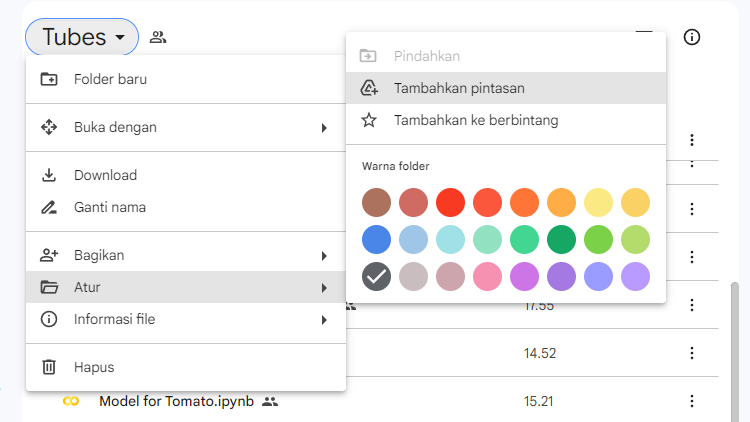
3. Klik dua kali bagian drive saya

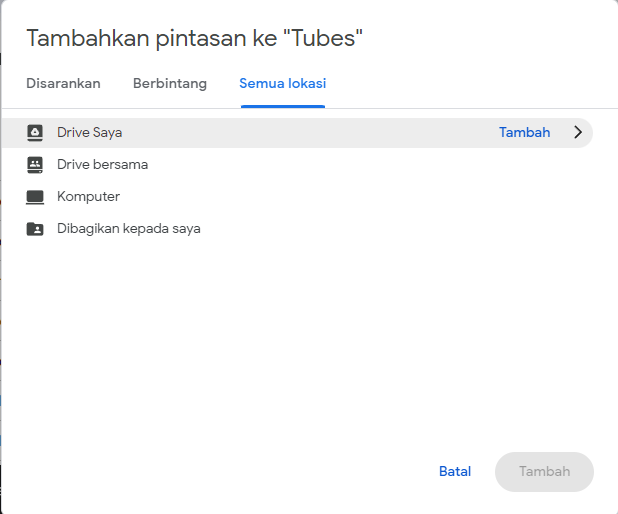
4. Buat folder baru dengan nama "Tutorial" (Tolong abaikan file lainnya :v)

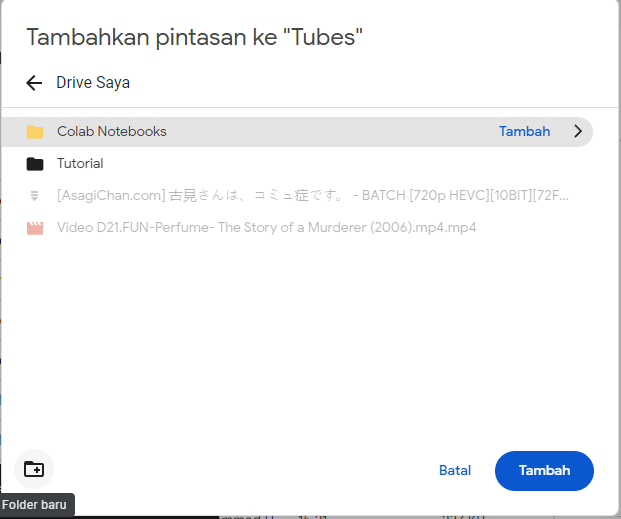
5. Tambahkan ke folder tutorial

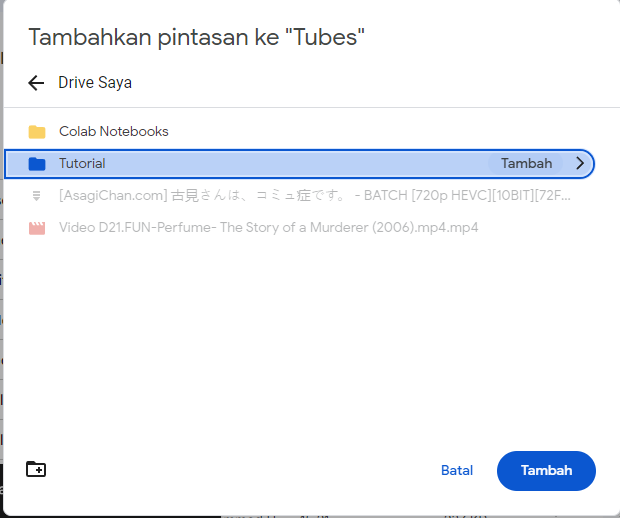

6. Save colab ini ke copy masing" (agar tidak bertabrakan saat dicoba), File -> Save a copy in drive

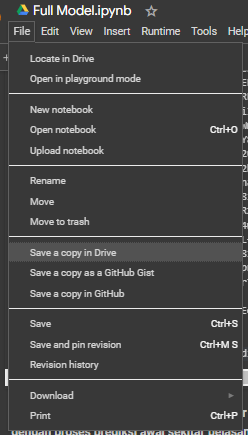
7. Colab baru akan terbuka di tab berikutnya dan jalankan colab tersebut (bukan colab yang ini).

Notes: **Pastikan menggunakan T4 GPU agar melakukan load tidak terlalu lama. Proses load model kurang lebih memakan waktu 10 menitan dengan proses prediksi awal sekitar belasan detik. Proses prediksi untuk image berikutnya kurang dari beberapa detik.**

## Import semua modul dan model yang telah dibuat

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
plant_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Classification_Model.keras")
plant_class = ['Kamboja', 'Kentang', 'Tomat']
kamboja_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Kamboja_Model.keras")
kamboja_class = ["Kamboja - Healthy", "Kamboja - Sick"]
tomato_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Tomato_Model.keras")
tomato_class = ["Tomat - Early Blight", "Tomat - Late Blight", "Tomat - Healthy"]
potato_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Potato_Model.keras")
potato_class = ["Kentang - Early Blight", "Kentang - Late Blight", "Kentang - Healthy"]

## Input image yang ingin diprediksi

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0d615a38-cfa4-45e4-b1b4-9977220e19ca___RS_HL 9815.JPG to 0d615a38-cfa4-45e4-b1b4-9977220e19ca___RS_HL 9815.JPG


In [ ]:
file_names = list(uploaded.keys())
file_names[0]

'0d615a38-cfa4-45e4-b1b4-9977220e19ca___RS_HL 9815.JPG'

## Memberikan hasil prediksi


In [ ]:
path = '/content/' + file_names[0]
image = tf.keras.utils.load_img(path, target_size=(256,256))
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
np.shape(input_arr)

(1, 256, 256, 3)

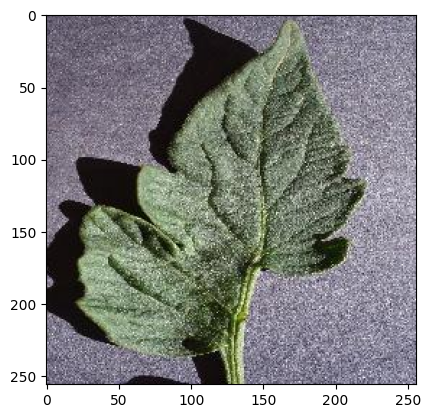

In [ ]:
plt.imshow(image)

In [ ]:
predict_jenis = plant_model.predict(input_arr)
jenis_tanaman = plant_class[np.argmax(predict_jenis)]
if(jenis_tanaman == "Kamboja"):
  predict_penyakit = kamboja_model.predict(input_arr)
  jenis_penyakit = kamboja_class[np.argmax(predict_penyakit)]
elif (jenis_tanaman == "Kentang"):
  predict_penyakit = potato_model.predict(input_arr)
  jenis_penyakit = potato_class[np.argmax(predict_penyakit)]
else:
  predict_penyakit = tomato_model.predict(input_arr)
  jenis_penyakit = tomato_class[np.argmax(predict_penyakit)]

print("Hasil prediksi:")
print("Jenis Tanaman:", jenis_tanaman)
print("Jenis Penyakit:", jenis_penyakit)

1/1 [==============================] - 2s 2s/step
Hasil prediksi:
Jenis Tanaman: Tomat
Jenis Penyakit: Tomat - Healthy
